# Introduction
## Goal. 
The goal of this lab is to investigate two examples of Competitive Co-Evolution: the first one dealing with a robotic prey-predator experiment, the second one dealing with a computational model for sorting algorithms, named Sorting Network.
## Getting started. 
This lab continues the use of the inspyred framework for the Python programming language seen in the previous labs. If you did not participate in the previous labs, you may want to look those over first and then start this lab's exercises. Additionally, in this lab we will use a custom 2-D robotic simulator (for more details, see module 9's exercises), and another Python library for Evolutionary Computation named deap$^{[1]}$. With respect to inspyred, deap has some nice features such as a simple template for co-evolutionary algorithms, and an easy-to-use Genetic Programming implementation. We will see the latter in the next lab.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to minimize the fitness function f(x), i.e. lower values correspond to a better fitness!

----
[1]: Distributed Evolutionary Algorithms in Python: https://github.com/DEAP/deap

# Exercise 1
In this exercise we will replicate the prey-predator competitive co-evolution experiments we have seen during the lecture. To do so, we will use a custom 2-D simulator. In this case by default the simulator generates an "empty" (without obstacles) arena $1920 \times 1080$ px, with two cars that at the beginning of the simulation are placed at opposite corners of the arena. One robot has the role of a "prey" (blue), the other acts as a "predator" (red). The goal of the prey is to avoid being "captured" (i.e., get in contact with) the predator, whereas the goal of the predator is to "capture" (get in touch with) the prey. 

By default, both cars are controlled by a Feed Forward Neural Network (FFNN) with 4 lidar sensor inputs to detect walls, 2 inputs for distance and bearing towards the "target" -in this case towards the other robot-, 5 hidden nodes, and 5 output nodes for controlling the behaviour of the robot (for more details, see module 9's exercises). All nodes use a tanh activation function, with inputs/outputs normalized in $[0, 1]$ and weights evolved in the range $[−3, 3]$.

In order to co-evolve the cars behaviors, two separate populations of preys and predators are evolved synchronously by two Evolutionary Algorithms that run in separate alternating threads (i.e., the evaluation part of the algorithm alternates between the two threads: evaluate preys, evaluate predators, evaluate preys, ...). Both algorithms can be parametrized differently (but, by default they use the same parameters), and are configured to keep an archive of best solutions (i.e., FFNN controllers) found during the evolution.

At each generation, each algorithm simulates its own solutions in the current population against (a subset of) the solutions taken from the archive kept by the other algorithm. For efficiency purposes, the simulation takes as input a list of $numRobots$ candidate solutions that is split in two halves, the first one containing preys, the second one containing predators. Then the simulator lets each $i$-th robot (a prey), for $i$ in $[0,numRobots/2)$, "compete" against the $(i+numRobots/2)$-th robot (the corresponding predator). Therefore each prey and each predator can be repeated in the list multiple times, in order to generate all the needed pairwise competitions between preys and predators. Before starting the experiments, spend some time to have look at the script `utils/utils_10/robot_coevolution.py` and understand its main steps (in particular, see the method evaluator of the class `RobotEvaluator`).

Depending on how fitness is defined for both preys and predators (you can change it in the next cell), different robot behaviors can be obtained. For each robot, the simulator returns three main quantities that can be used/combined differently to drive the co-evolution in different ways, namely:

1. finalDistanceToTarget: the final (measured at the end of the simulation) distance to the "target" robot.
2. minDistanceToTarget: the minimum (measured during the simulation) distance to the "target" robot.
3. timeToContact: the time to contact (in timesteps, in the range [0,nrTimeStepsGen]).
    
By default, the preys are evolved to maximize their minDistanceToTarget, while the predators are evolved to minimize it. Please note that the two distance metrics range in $[0, \sqrt{2}]$ (in px) where $\sqrt{2}$ is pre-computed as the maximum distance normalized in the given environment (length of the diagonal of the arena). Also, note that, due to the aforementioned structure of the list of candidate solutions taken as input, preys are kept in the first $numRobots/2$ elements of the list, while predators are kept in the remaining elements, such that different fitness functions can be used for preys and predators.

Furthermore, the way the two algorithms update the corresponding archives of best solutions can be controlled by the following parameters:

- numOpponents: the number of opponents against which each robot competes at each generation (default: 1).
- archiveType: the way competition with individuals from the archive is performed; possible values are {GENERATION, HALLOFFAME, BEST} (default: BEST). When GENERATION is selected, generational competition is performed, i.e. each algorithm keeps an archive containing one best solution for each of the previous numOpponents generations, such that at each generation each robot competes against the best opponents from those numOpponents generations (Master Tournaments). Similarly, when HALLOFFAME is selected each algorithm keeps an archive containing one best solution for each of the previous generations, however in this case there is no limit on the number of solutions kept in the archive (whose size increases along generations), and numOpponents indicates the number of solutions which are randomly sampled from the archive to perform pairwise competitions (see the lecture slides). When BEST is selected, a greedy approach is taken: in this case indeed each algorithm keeps in the archive the best numOpponents opponents from all previous generations (not necessarily one per generation), and each robot competes against those opponents.
- archiveUpdate: the way fitness is aggregated for each robot; possible values are {WORST, AVERAGE} (default: WORST). When WORST is selected, each robot competes against numOpponents opponents from the other algorithm's archive and its final fitness is set to its worst value obtained across numOpponents competitions (worst-case scenario). When AVERAGE is selected, the final fitness of each robot is set to its average value obtained across numOpponents competitions.
- updateBothArchives: the way archives are updated at each generation; possible values are {True, False} (default: False). When False is selected, each algorithm updates only its own archive. When True is selected, each algorithm also recomputes the fitness of the opponents and updates the other algorithm's archive if needed (this is a non-standard feature).
    
Consider the following experiments:
- Try out different parameter combinations of numOpponents, archiveType, archiveUpdate, and updateBothArchives, and observe what kind of robot behavior is evolved. Can you find cases where the prey "wins"? Can you find cases where the predator "wins"?
- Try to change the fitness formulation and observe what kind of behavior is evolved. Remember to change the two flags problemPreysMaximize and problemPredatorsMaximize properly, according to the way you defined the fitness function.
- (Optional) Try to change the EA's and FFNN's parameters to see if/how results change depending on those values.

pygame 2.4.0 (SDL 2.26.4, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
Preys 0 / 10
Predators 0 / 10
Preys 1 / 10
Predators 1 / 10
Preys 2 / 10
Predators 2 / 10
Preys 3 / 10
Predators 3 / 10
Preys 4 / 10
Predators 4 / 10
Preys 5 / 10
Predators 5 / 10
Preys 6 / 10
Predators 6 / 10
Preys 7 / 10
Predators 7 / 10
Preys 8 / 10
Predators 8 / 10
Preys 9 / 10
Predators 9 / 10
Preys 10 / 10
Predators 10 / 10
prey 0.7987775981430161
predator 0.76079455349224


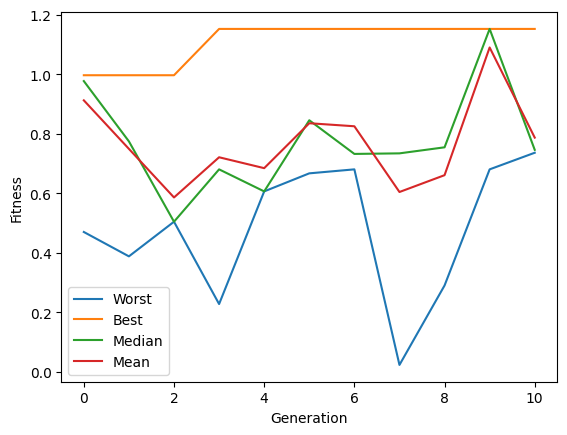

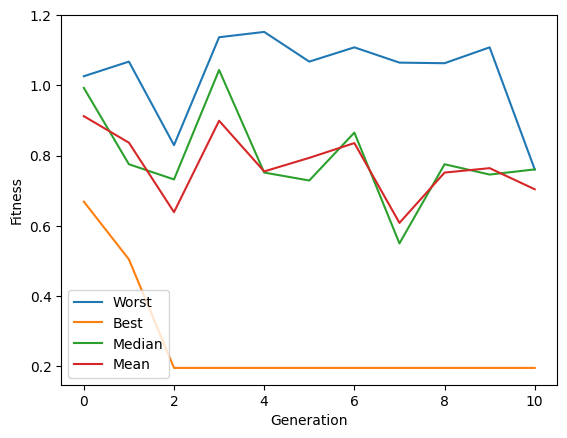

In [2]:
# -*- coding: utf-8 -*-

from random import shuffle
from queue import Queue

import shutil
import os.path
import inspyred
import pickle

from pylab import *

from inspyred import ec
from utils.utils_10.inspyred_utils import NumpyRandomWrapper
from utils.utils_10.exercise_maze import *
from utils.utils_10.network import *
from utils.utils_10.robots_coevolution import *
import utils.utils_10.cfg as shared_variable

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

config = {"sensors": True,
          "nrHiddenNodes": 5,
          "nrHiddenLayers": 1,
          "map": "white.png",      # parameters for standard GA
          "popSize": 10,           # population size
          "numGen": 10,            # used with generation_termination
          "tournamentSize": 2,     # tournament size (default 2)
          "mutationRate": 0.2,     # mutation rate, per gene (default 0.1)
          "gaussianMean": 0,       # mean of the Gaussian distribution used for mutation
          "gaussianStdev": 0.1,    # std. dev. of the Gaussian distribution used for mutation
          "crossoverRate": 1.0,    # rate at which crossover is performed (default 1.0)
          "numCrossoverPoints": 1, # number of crossover points used (default 1)
          "numElites": 1,          # no. of elites (i.e. best individuals that are kept in the population # parameters for competitive coevolution
          "selectionSize": 10,     # selection size (i.e. how many individuals are selected for reproduction)
          "numOpponents": 1,       # number of opponents against which each robot competes at each generation
          "archiveType": "GENERATION",  # possible types: {GENERATION,HALLOFFAME,BEST}
          "archiveUpdate": "AVERAGE",   # possible types: {WORST,AVERAGE}
          "updateBothArchives": True,   # True is each generation should update both archives, False otherwise
          "display" : True,
          "showArchives" : False
          }

config["selectionSize"] = config['popSize']

# 1. Generational competition: the archive is filled with the best individuals from previous n generations (e.g. n=5)
# 2. Hall-of-Fame: each new individual is tested against *all best opponents* obtained so far.
#    NOTE: Using this method, the no. of tournaments increases along generations!
#    However, it is sufficient to test new individuals only against a limited sample of n opponents (e.g. n=10)
# 3. Best competition: the archive is filled with the best n (e.g. n=5) individuals from *all* previous generations

def fitness_eval_prey(finalDistanceToTarget, avgDistanceToTarget, minDistanceToTarget, maxDistanceToTarget, timeToContact):
    fitness = finalDistanceToTarget
    return fitness

def fitness_eval_predator(finalDistanceToTarget, avgDistanceToTarget, minDistanceToTarget, maxDistanceToTarget, timeToContact):
    fitness = finalDistanceToTarget
    return fitness

"""
-------------------------------------------------------------------------
"""
cc = shared_variable.cfgs()

# These two archives keep the best preys and best predators

if config["archiveType"] == "GENERATION" or config["archiveType"] == "BEST":
    cc.archivePreys = ArchiveSolutions( config["numOpponents"])
    cc.archivePredators = ArchiveSolutions( config["numOpponents"])
elif  config["archiveType"] == "HALLOFFAME":
    cc.archivePreys = ArchiveSolutions()
    cc.archivePredators = ArchiveSolutions()

#  the initial popolations (we need to make initialize them externally to initialize the archives)

cc.initialPreys = ArchiveSolutions(config['popSize'])
cc.initialPredators = ArchiveSolutions(config['popSize'])

# TODO: change maximize flag depending on how fitness is defined
cc.problemPreysMaximize = True  # e.g. maximize (final/min) distance from predator or maximize time-to-contact
cc.problemPredatorsMaximize = False  # e.g. minimize (final/min) distance from prey or minimize time-to-contact

config["shared_variables"] = cc

# --------------------------------------------------------------------------- #

seed = 0
rng = NumpyRandomWrapper(seed)
#  the following queues allow the two threads to alternate their execution
qAB = Queue()
qBA = Queue()

# create the robot evaluator instances
problemPreys = RobotEvaluator(config, fitness_eval_prey, fitness_eval_predator, "Preys", qAB, qBA, seed, cc.problemPreysMaximize)
problemPredators = RobotEvaluator(config, fitness_eval_predator, fitness_eval_predator, "Predators", qBA, qAB, seed, cc.problemPredatorsMaximize)

# create the initial populations
for i in np.arange(config['popSize']):
    candidatePrey = [(problemPreys.geneMax - problemPreys.geneMin) * rng.random_sample() + problemPreys.geneMin \
                     for _ in range(problemPreys.nrWeights)]
    cc.initialPreys.appendToArchive(candidatePrey)
for i in np.arange(config['popSize']):
    candidatePredator = [
        (problemPredators.geneMax - problemPredators.geneMin) * rng.random_sample() + problemPredators.geneMin \
        for _ in range(problemPredators.nrWeights)]
    cc.initialPredators.appendToArchive(candidatePredator)

t1 = threading.Thread(target=runEA, args=(problemPreys,config["display"], rng, config))
t2 = threading.Thread(target=runEA, args=(problemPredators,config["display"], rng, config))

# this is needed to unlock the thread "Preys" first
qAB.put(1)

t1.start()
t2.start()

t1.join()
t2.join()

if config["display"]:
    """
    # rerun every prey in the archive against every predator in the archive
    preysPredators = []

    # append preys
    for predator in archivePredators.candidates:
        for prey in archivePreys.candidates:
            preysPredators.append(prey)
    # append predators
    for predator in archivePredators.candidates:
        for prey in archivePreys.candidates:
            preysPredators.append(predator)
    """

    # rerun the best prey in the archive against the best predator in the archive
    preysPredators = []
    indexOfBestPrey = getIndexOfBest(cc.archivePreys.fitnesses, cc.problemPreysMaximize)
    bestPrey = cc.archivePreys.candidates[indexOfBestPrey]
    bestPreyFitness = cc.archivePreys.fitnesses[indexOfBestPrey]
    indexOfBestPredator = getIndexOfBest(cc.archivePredators.fitnesses, cc.problemPredatorsMaximize)
    bestPredator = cc.archivePredators.candidates[indexOfBestPredator]
    bestPredatorFitness = cc.archivePredators.fitnesses[indexOfBestPredator]
    print("prey " + str(bestPreyFitness))
    print("predator " + str(bestPredatorFitness))
    preysPredators.append(bestPrey)
    preysPredators.append(bestPredator)
    
    statsPreys = np.transpose(np.loadtxt(open("./stats_Preys.csv", "r"), delimiter=","))
    statsPredators = np.transpose(np.loadtxt(open("./stats_Predators.csv", "r"), delimiter=","))

    # plot fitness trends of preys and predators
    figure("Preys")
    plot(statsPreys[2], label="Worst")
    plot(statsPreys[3], label="Best")
    plot(statsPreys[4], label="Median")
    plot(statsPreys[5], label="Mean")
    # yscale("log")
    xlabel("Generation")
    ylabel("Fitness")
    legend()

    figure("Predators")
    plot(statsPredators[2], label="Worst")
    plot(statsPredators[3], label="Best")
    plot(statsPredators[4], label="Median")
    plot(statsPredators[5], label="Mean")
    # yscale("log")
    xlabel("Generation")
    ylabel("Fitness")
    legend()
    show()
    with open("results/bests.pkl", "wb") as f:
        pickle.dump([(bestPrey, bestPredator), config], f)

In [3]:
import os
# NOTE: check that you are calling the correct version of python here!
os.popen("python3 post_eval.py results/bests.pkl").read();

# Exercise 2
In this exercise we will use a competitive co-evolutionary approach for evolving a Sorting Network (SN)$^{[1]}$. A SN is an abstract mathematical model of a network of wires and comparator modules (connectors) that is used to sort a sequence of numbers fed as input to the network. Each comparator connects two wires and sorts the values by outputting the smaller value to one wire, and the larger value to the other. For further details on the theory behind SNs, refer to the  corresponding Wikipedia page. For illustration purposes, an example of SN is shown in the figure.

![sn.png](img/img_10/sn.png)

The code of this exercise is based on one of the deap examples and provides a nice template for a generic competitive co-evolutionary algorithm in this framework. Similarly to the previous exercise, also in this case two separate populations are kept, one for hosts (where each host is a candidate sorting network) and one for parasites (where each parasite is an array of a given number of shuffled sequences to be sorted). For simplicity, we consider here a binary sorting problem, where input sequences are (unsorted) binary strings of fixed size, such as $\{1,0,0,0,1,1,0,1\}$. The size of the evolved SNs (also called depth, i.e. its number of connectors) is instead variable and evolves with the hosts$^{[2]}$. The goal of a host is to sort all sequences in the competing parasite, while the goal of a parasite is to induce errors in the competing host. The fitness of a host is therefore calculated as the total number of sequences that it could not sort properly, from those
sequences present in the parasite against which that host competed. The fitness of the parasite is exactly the same value. Obviously, the fitness of hosts (number of sorting errors) must be minimized, while the fitness of parasites should be maximized.

While the deap library is based on some different concepts and implementation details with respect to the inspyred library we have used so far, its working principles are quite straightforward and can be understood rather easily. Take some time to have a look at the source code in the cell below and in the script `exercise_sortingnetwork.py` (note however that the implementation of the Sorting Network is available in the module `sortingnetwork.py` in the `utils/deapCoev folder`). The relevant parameters of the Evolutionary Algorithm, hosts and parasites, can be found at the beginning of the script. In particular, consider the parameters `INPUTS, POP_SIZE_HOSTS, POP_SIZE_PARASITES, HOF_SIZE, MAXGEN, H_CXPB, H_MUTPB, P_CXPB, P_MUTPB, H_TRNMT_SIZE, P_TRNMT_SIZE, P_NUM_SEQ`. Note that in this case (differently from the previous exercise) the two populations are evolved within a single thread, and that at each generation all hosts in the current population are tested against all parasites in the current population. A Hall-of-Fame is kept to store the SNs displaying the best performance across generations, and updated whenever a new SN has a better performance (smaller number of sorting errors) than the worst SN in the Hall-of-Fame. The final output of the script is a graphical representation of the best SN in the Hall-of-Fame, and the number of
sorting errors it suffers on all possible input sequences of fixed input size equal to `INPUTS`. Also, the usual plot with the min/max/avg fitness trends is provided.

Run the cell below to perform the competitive co-evolutionary experiment. Also in this case you can pass as argument to the script a specific seed.

 - Is the co-evolutionary algorithm able to evolve an optimal (without sorting errors) SN, in the default configuration?
 - Try to investigate this problem in different configurations. In particular, focus on the effect of the size of the input sequences (`INPUTS`), the number of input sequences per parasite (`P_NUM_SEQ`), and the two population sizes (`POP_SIZE_HOSTS` and` POP_SIZE_PARASITES`). If needed, also change the size of the Hall-of-Fame (`HOF_SIZE`) and the number of generations  (`MAXGEN`). What conclusions can you draw? For instance: What makes the problem harder? What is the effect of `P_NUM_SEQ`? What can you do to solve the harder problem instances?
 
---

[3]: Link to https://en.wikipedia.org/wiki/Sorting_network

[4]: Note that the depth of a SN is a measure of its algorithmic complexity. Optimal (minimum-depth) SNs are currently known only up to a inputs sequences of size equal to 17, see the corresponding Wikipedia page. In principle, one could use EAs also for minimizing the depth, together with the sorting errors, either based on a single objective (with calarization) or on a multi-objective approach optimizing depth and sorting errors separately.

gen	evals	std    	min	avg    	max
0  	300  	3.11835	103	116.757	120
1  	300  	3.29177	103	115.76 	120
2  	300  	4.00884	100	114.077	120
3  	300  	4.24416	100	112.98 	120
4  	300  	4.31923	100	111.47 	120
5  	300  	4.78769	93 	109.963	120
6  	300  	4.58924	99 	109.213	118
7  	300  	4.91752	92 	107.893	119
8  	300  	4.72588	94 	107.763	120
9  	300  	4.96141	90 	106.867	120
10 	300  	5.16889	90 	105.923	118
11 	300  	5.09416	88 	104.947	119
12 	300  	5.47811	90 	104.283	119
13 	300  	5.22734	85 	102.96 	118
14 	300  	5.22388	88 	102.38 	116
15 	300  	5.50707	84 	101.83 	118
16 	300  	5.67399	85 	101.55 	119
17 	300  	5.62977	87 	101.18 	115
18 	300  	5.97517	85 	100.527	118
19 	300  	5.86115	82 	99.13  	113
20 	300  	5.76734	82 	97.7333	113
21 	300  	5.63737	83 	97.3267	118
22 	300  	5.99951	81 	96.65  	115
23 	300  	6.22345	77 	95.9067	115
24 	300  	5.97298	77 	95.4867	112
25 	300  	5.98377	80 	94.6333	114
26 	300  	6.16295	79 	94.41  	112
27 	300  	5.864  	76 	93.3467	108
28 	300  	5.45

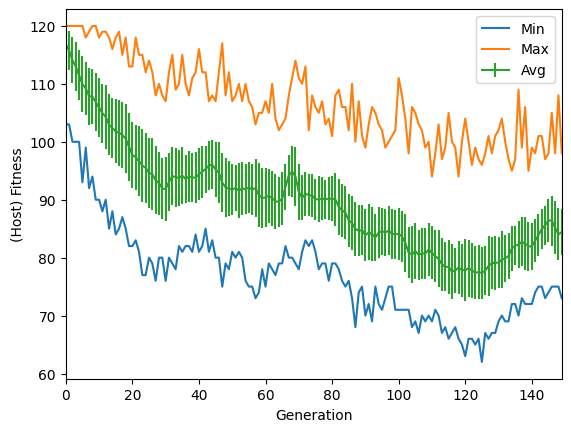

In [13]:
# -*- coding: utf-8 -*-

#    This file is part of DEAP.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

import time
import random
import sys

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt

import utils.utils_10.deapCoev.sortingnetwork as sn
from utils.utils_10.deapCoev.sortingnetwork import *

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

config = { "INPUTS": 15,        # length of the input sequence to sort
"POP_SIZE_HOSTS" : 300,        # population size for hsots
"POP_SIZE_PARASITES" : 300,    # population size for parasites
"HOF_SIZE" : 2,                # size of the Hall-of-Fame
"MAXGEN" : 150,                 # number of generations
"H_CXPB" : 0.5,                # crossover probability for hosts
"H_MUTPB" : 0.3,               # mutation probability for hosts
"P_CXPB":0.5,                  # crossover probability for parasites
"P_MUTPB" : 0.3,               # mutation probability for parasites
"H_TRNMT_SIZE" : 3,            # tournament size for hosts
"P_TRNMT_SIZE" : 3,            # tournament size for parasites
"P_NUM_SEQ" : 120               # number of shuffled sequences for each parasite
}

"""
-------------------------------------------------------------------------
"""

#--------------------------------------------------------------------
# The EA parametrization

# this four lines simply tells DEAP that
# 1. hosts want to minimize (the sorting errors)
# 2. parasites want to maximize (the sorting errors)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Host", list, fitness=creator.FitnessMin)
creator.create("Parasite", list, fitness=creator.FitnessMax)

htoolbox = base.Toolbox()
ptoolbox = base.Toolbox()

# register the initialization operators for hosts
htoolbox.register("network", genNetwork, dimension=config["INPUTS"], min_size=config["INPUTS"], max_size=config["INPUTS"]*2)
htoolbox.register("individual", tools.initIterate, creator.Host, htoolbox.network)
htoolbox.register("population", tools.initRepeat, list, htoolbox.individual)

# register the initialization operators for parasites
ptoolbox.register("parasite", getParasite, dimension=config["INPUTS"])
# NOTE: each parasite is actually an array of P_NUM_SEQ shuffled sequences (not just one)
ptoolbox.register("individual", tools.initRepeat, creator.Parasite, ptoolbox.parasite,config["P_NUM_SEQ"] )
ptoolbox.register("population", tools.initRepeat, list, ptoolbox.individual)

# register the evaluation/crossover/mutation/selection/clone operators for hosts
# we keep the additional specific parameters as they are
htoolbox.register("evaluate", evalNetwork, dimension=config["INPUTS"])
htoolbox.register("mate", tools.cxTwoPoint)
htoolbox.register("mutate", mutNetwork, dimension=config["INPUTS"], mutpb=0.2, addpb=0.01, delpb=0.01, indpb=0.05)
htoolbox.register("select", tools.selTournament, tournsize=config["H_TRNMT_SIZE"])
htoolbox.register("clone", cloneHost)

# register the crossover/mutation/selection/clone operators for parasites
# note that in this case an evaluation function is not defined explicitly
# (parasite"s fitness is the same as the corresponding host, see below)
# we keep the additional specific parameters as they are
ptoolbox.register("mate", tools.cxTwoPoint)
ptoolbox.register("indMutate", tools.mutFlipBit, indpb=0.05)
ptoolbox.register("mutate", mutParasite, indmut=ptoolbox.indMutate, indpb=0.05)
ptoolbox.register("select", tools.selTournament, tournsize=config["P_TRNMT_SIZE"])
ptoolbox.register("clone", cloneParasite)

#--------------------------------------------------------------------
seed = 0
main(seed, creator, htoolbox, ptoolbox, config);

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- Can you provide some example applications where you think a competitive co-evolution approach could be used?
- Can you think of some other competitive co-evolutionary dynamics in nature different from the prey-predator case?